In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
train_df = pd.read_csv('TrainingRidge.csv')
train_x = train_df[['x1', 'x2']]
train_y = train_df['obs']
val_df = pd.read_csv('ValidationRidge-Y.csv')
val_x = val_df[['x1', 'x2']]
val_y = val_df['dens']

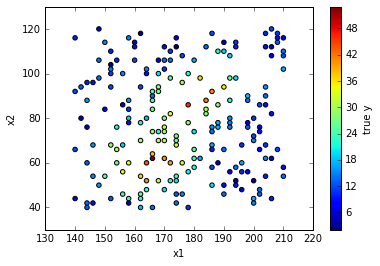

In [3]:
plt.scatter(train_x['x1'], train_x['x2'], c=train_y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='true y')

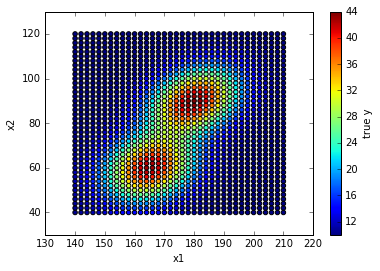

In [4]:
plt.scatter(val_x['x1'], val_x['x2'], c=val_y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='true y')

a) Perform whitening (sphering) of the training data

In [5]:
mean = train_x.mean()
std = train_x.std()
mean, std

(x1    176.33
 x2     78.50
 dtype: float64, x1    19.917193
 x2    23.327901
 dtype: float64)

In [6]:
# Sphering.
train_x = (train_x - mean) / std
val_x = (val_x - mean) / std

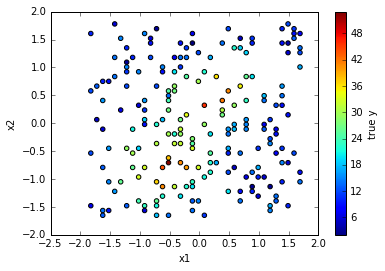

In [7]:
plt.scatter(train_x['x1'], train_x['x2'], c=train_y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='true y')

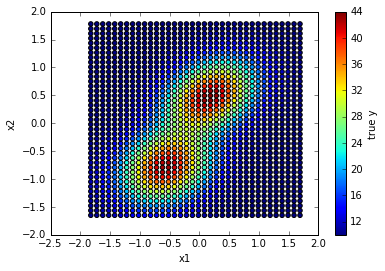

In [8]:
plt.scatter(val_x['x1'], val_x['x2'], c=val_y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='true y')

In [9]:
train_x.shape, train_y.shape

((200, 2), (200L,))

In [9]:
# Train linear neuron on the sphered data.
X = train_x.T  # each row is one sample
y = train_y.reshape(-1, 1)
w = np.linalg.inv(X.dot(X.T)).dot(X).dot(y)
w

array([[-1.44017209],
       [-1.80281196]])

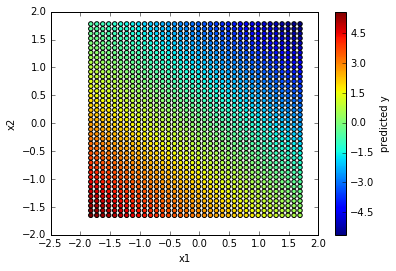

In [10]:
pred_val_y = w.T.dot(val_x.T)
plt.scatter(val_x['x1'], val_x['x2'], c=pred_val_y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='predicted y')

b) expand the sphered 2-dimensional input samples to all possible monomials up to degree 9

In [11]:
# Make monomials of input samples.
# Note: Monomials also include a weight for the bias (x1^0*x2^0).
monomials_train_x = pd.DataFrame()
monomials_val_x = pd.DataFrame()

for k in range(10):  # degree of the monomial
    for a in range(k + 1):  # degree of the first polynomial
        b = k - a  # degree of the second polynomial
        monomials_train_x['x1^{}*x2^{}'.format(a, b)] = train_x['x1']**a * train_x['x2']**b
        monomials_val_x['x1^{}x2^{}'.format(a, b)] = val_x['x1']**a * val_x['x2']**b

In [12]:
monomials_train_x.describe()

,x1^0*x2^0,x1^0*x2^1,x1^1*x2^0,x1^0*x2^2,x1^1*x2^1,x1^2*x2^0,x1^0*x2^3,x1^1*x2^2,x1^2*x2^1,x1^3*x2^0,...,x1^0*x2^9,x1^1*x2^8,x1^2*x2^7,x1^3*x2^6,x1^4*x2^5,x1^5*x2^4,x1^6*x2^3,x1^7*x2^2,x1^8*x2^1,x1^9*x2^0
count,200.0,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.0,3.330669e-18,-6.206147e-16,0.995000,0.048501,0.995000,0.091703,0.008106,0.071467,0.002921,...,3.265412e+00,1.400211e-01,2.352862e+00,5.215529e-01,1.949390e+00,4.466981e-01,1.795269e+00,1.635053e-01,1.860261e+00,-2.964712e+00
std,0.0,1.000000e+00,1.000000e+00,0.899936,1.060531,0.932675,1.963383,1.480229,1.494589,2.057630,...,3.280811e+01,2.450392e+01,2.160330e+01,2.046537e+01,2.003214e+01,2.055457e+01,2.172515e+01,2.412297e+01,2.876418e+01,4.406395e+01
min,1.0,-1.650384e+00,-1.824052e+00,0.000459,-2.932195,0.000275,-4.495264,-4.713554,-4.920599,-6.068925,...,-9.083760e+01,-1.426914e+02,-8.787203e+01,-1.047238e+02,-8.500327e+01,-1.348369e+02,-1.191390e+02,-1.736089e+02,-1.812348e+02,-2.235298e+02
25%,1.0,-8.144753e-01,-7.445828e-01,0.165843,-0.481796,0.174918,-0.543725,-0.462178,-0.450198,-0.417118,...,-1.711867e-01,-3.228138e-01,-1.003930e-01,-1.005281e-01,-6.061312e-02,-5.050929e-02,-9.140520e-02,-9.706999e-02,-1.242749e-01,-8.060219e-02
50%,1.0,-6.430069e-02,-1.169844e-01,0.698744,-0.014711,0.672227,-0.000620,-0.006010,-0.006355,-0.001601,...,-9.322864e-10,-1.251794e-08,-8.200432e-09,-2.395683e-07,-1.498866e-08,-1.356985e-07,-2.573411e-07,-1.957390e-07,-1.127737e-08,-4.103459e-09
75%,1.0,8.359089e-01,8.871732e-01,1.709418,0.539724,1.661099,0.584086,0.311660,0.389333,0.698273,...,1.992648e-01,6.348160e-02,1.201407e-01,3.048592e-02,4.617531e-02,4.527154e-02,5.905287e-02,1.459745e-01,1.218637e-01,3.404676e-01
max,1.0,1.778986e+00,1.690499e+00,3.164790,2.717507,3.327167,5.630116,4.714485,5.348477,4.831088,...,1.784645e+02,1.494407e+02,1.251370e+02,1.047859e+02,1.188303e+02,9.219288e+01,1.529996e+02,1.019568e+02,1.969943e+02,1.127548e+02


In [81]:
# Train linear neuron on the monomials.
X = monomials_train_x.T  # each row is one sample
y = train_y.reshape(-1, 1)
w_monomials = np.linalg.inv(X.dot(X.T)).dot(X).dot(y)
#w_monomials

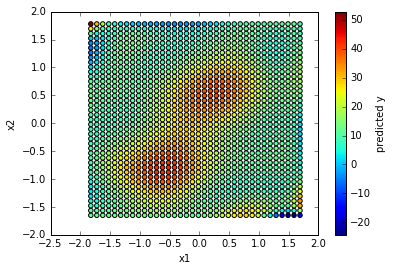

In [82]:
pred_val_y = w_monomials.T.dot(monomials_val_x.T)
plt.scatter(val_x['x1'], val_x['x2'], c=pred_val_y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='predicted y')

c) To find the best regularization constant, perform a 10-fold cross-validation with the training
set

In [150]:
# Find best lambda for regularization.
from sklearn.model_selection import KFold

lambda_exponents = np.arange(-4., 4.1, 0.1)
lambdas = 10**lambda_exponents
mses_per_lambda = []

for lam in lambdas:
    mses = []
    
    # Make folds for cross validation.
    for train, test in KFold(n_splits=10, random_state=0, shuffle=True).split(monomials_train_x):        
        cv_train_X = monomials_train_x.T[train]  # each row is one sample
        cv_train_y = train_y.reshape(-1, 1)[train]
        cv_test_X = monomials_train_x.T[test]
        cv_test_y = train_y.reshape(-1, 1)[test]

        w = np.linalg.inv(cv_train_X.dot(cv_train_X.T) + lam * np.identity(len(cv_train_X))).dot(cv_train_X).dot(cv_train_y)

        pred_cv_test_y = w.T.dot(cv_test_X)
        mse = np.mean((pred_cv_test_y - cv_test_y)**2)
        mses.append(mse)

    mses_per_lambda.append(mses)

Minimum MSE of 125.514612584 for lambda = 10**1.6


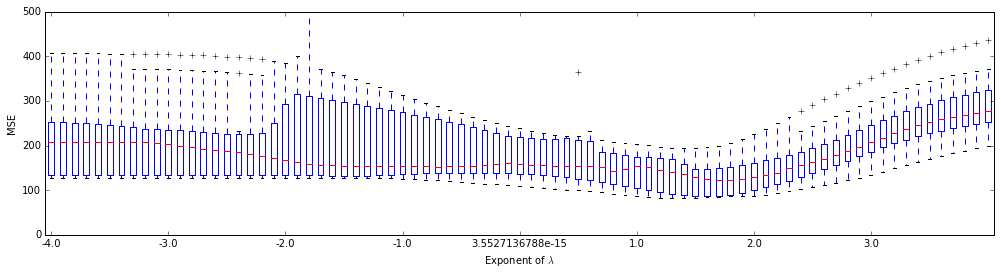

In [151]:
plt.figure(figsize=(17, 4))
plt.boxplot(mses_per_lambda)
plt.xticks(range(1, len(mses_per_lambda), 10), lambda_exponents[::10])
plt.ylim(0, 500)
plt.xlabel('Exponent of $\lambda$')
plt.ylabel('MSE')

mean_mses = np.array(mses_per_lambda).mean(axis=1)
print 'Minimum MSE of {} for lambda = 10**{}'.format(np.min(mean_mses), lambda_exponents[np.argmin(mean_mses)])

In [141]:
# Train linear neuron on the monomials with regularization.
X = monomials_train_x.T  # each row is one sample
y = train_y.reshape(-1, 1)
lam = 10**1.8
w_regularized = np.linalg.inv(X.dot(X.T) + lam * np.identity(len(X))).dot(X).dot(y)

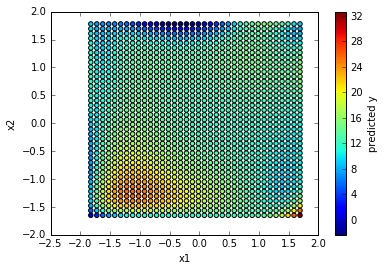

In [143]:
pred_val_y = w_regularized.T.dot(monomials_val_x.T)
plt.scatter(val_x['x1'], val_x['x2'], c=pred_val_y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='predicted y')

d) repeat (c) with the polynomial expansion of the validation set

In [144]:
# Find best lambda for regularization.
from sklearn.model_selection import KFold

lambda_exponents = np.arange(-4., 4.1, 0.1)
lambdas = 10**lambda_exponents
mses_per_lambda = []

for lam in lambdas:
    mses = []
    
    # Make folds for cross validation.
    for train, test in KFold(n_splits=10, random_state=0).split(monomials_val_x):        
        cv_train_X = monomials_val_x.T[train]  # each row is one sample
        cv_train_y = val_y.reshape(-1, 1)[train]
        cv_test_X = monomials_val_x.T[test]
        cv_test_y = val_y.reshape(-1, 1)[test]

        w = np.linalg.inv(cv_train_X.dot(cv_train_X.T) + lam * np.identity(len(cv_train_X))).dot(cv_train_X).dot(cv_train_y)

        pred_cv_test_y = w.T.dot(cv_test_X)
        mse = np.mean((pred_cv_test_y - cv_test_y)**2)
        mses.append(mse)

    mses_per_lambda.append(mses)

Minimum MSE of 203.96531996 for lambda = 10**3.0


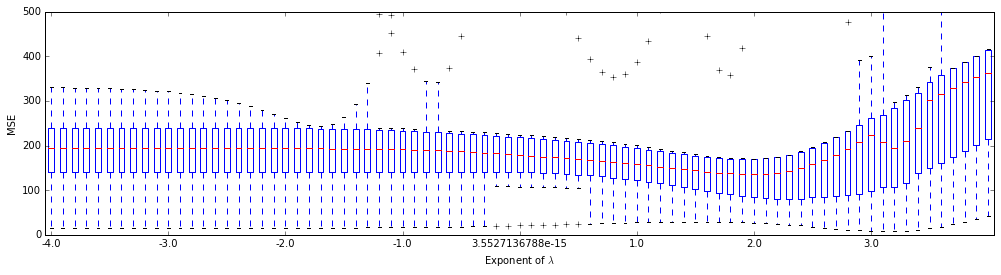

In [145]:
plt.figure(figsize=(17, 4))
plt.boxplot(mses_per_lambda)
plt.xticks(range(1, len(mses_per_lambda), 10), lambda_exponents[::10])
plt.ylim(0, 500)
plt.xlabel('Exponent of $\lambda$')
plt.ylabel('MSE')

mean_mses = np.array(mses_per_lambda).mean(axis=1)
print 'Minimum MSE of {} for lambda = 10**{}'.format(np.min(mean_mses), lambda_exponents[np.argmin(mean_mses)])

In [146]:
# Train on training dataset.
X = monomials_train_x.T  # each row is one sample
y = train_y.reshape(-1, 1)
lam = 10**3.0
w_regularized = np.linalg.inv(X.dot(X.T) + lam * np.identity(len(X))).dot(X).dot(y)

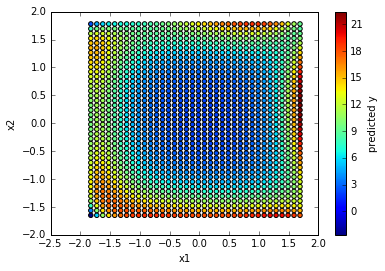

In [147]:
pred_val_y = w_regularized.T.dot(monomials_val_x.T)
plt.scatter(val_x['x1'], val_x['x2'], c=pred_val_y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='predicted y')

In [148]:
# Train on validation dataset.
X = monomials_val_x.T  # each row is one sample
y = val_y.reshape(-1, 1)
lam = 10**3.0
w_regularized = np.linalg.inv(X.dot(X.T) + lam * np.identity(len(X))).dot(X).dot(y)

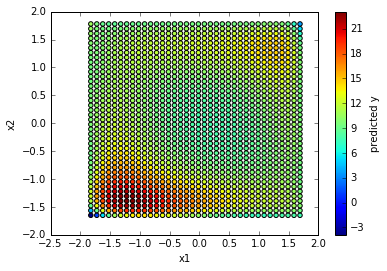

In [149]:
pred_val_y = w_regularized.T.dot(monomials_val_x.T)
plt.scatter(val_x['x1'], val_x['x2'], c=pred_val_y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='predicted y')